In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_spss('C:/Users/RIYA AGARWAL/Desktop/NC Project/Uttarpradesh_edited2_cnns.sav')

In [5]:
#Taking into account state weights
df1 = df.loc[df.index.repeat(df.Weights)]

In [6]:
df.shape

(1798, 132)

In [7]:
df1.shape

(179912, 132)

In [8]:
pd.set_option('display.max_rows', 132)
df1.isna().sum()

caseid                      0
state                       0
area                        0
psu_no                      0
psu_no_ov                   0
region                      0
hh_no                       0
int_d                       0
int_m                       0
int_y                       0
sex                         0
q103m                       0
q103y                     670
q104                        0
q111m                       0
q111y                       0
q112                        0
q114                        0
q115                        0
q116                     3007
q117                        0
q125                        0
q201A                       0
q201B                       0
q201C                       0
q201D                       0
q201E                       0
q201F                       0
q201G                       0
q201H                       0
q201I                       0
q201J                       0
q201X                       0
q201Y     

In [9]:
#Data frame with relevant columns having sufficient data points
df2 = df1[['area','sex','q104','q125','q201A','q201B','q201C','q201D','q201E','q201F','q201G','q201H','q201I','q201J','q901r1','height','muac','tsft','ssft','wc','agemons','@_cbmi','Days_Fat','Sugar','cereals','Milk','Pulse','Green_veg','Roots_tubers','veg','fruits','eggs','fish','nonveg','nuts']]

In [91]:
df2.head()

,area,sex,q104,q125,q201A,q201B,q201C,q201D,q201E,q201F,...,Milk,Pulse,Green_veg,Roots_tubers,veg,fruits,eggs,fish,nonveg,nuts
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Waist circumference

In [10]:
#Correlation of waist circumference with other variables
df2[df2.columns[1:]].corr()['wc'][:].sort_values(ascending=False).to_frame()

,wc
wc,1.000000
q901r1,0.838915
muac,0.816529
@_cbmi,0.792783
ssft,0.640845
height,0.617667
agemons,0.554601
q104,0.549129
tsft,0.524066
fruits,0.110675


In [11]:
    import seaborn as sns

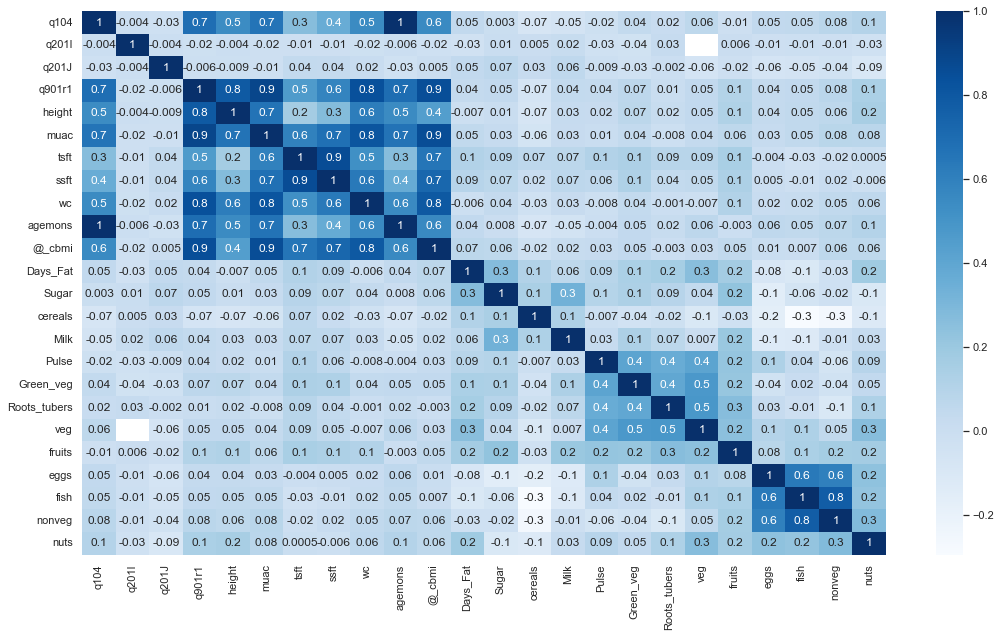

In [12]:
plt.figure(figsize=(18,10))
sns.set_theme(style="white")
corr = df2.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [13]:
#mean wc grouped by number of days a week fruits is eaten
y = df2.groupby('fruits')['wc'].mean()

In [14]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

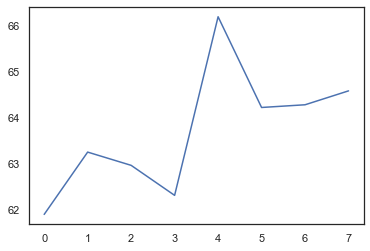

In [15]:
plt.plot(x,y)

In [31]:
#further grouped by age of children
y = df2.groupby(['q104','fruits'])['wc'].mean()
y

q104  fruits
10.0  0.0       56.856423
      1.0       54.245073
      2.0       58.981193
      3.0       58.359011
      4.0       60.126715
      5.0       57.912149
      6.0       61.299999
      7.0       56.216804
11.0  0.0       54.309706
      1.0       52.749716
      2.0       57.420879
      3.0       59.505017
      4.0       62.240082
      5.0       54.531788
      7.0       57.991108
12.0  0.0       62.660371
      1.0       56.827187
      2.0       58.746021
      3.0       57.655427
      4.0       59.377649
      5.0       65.550777
      6.0       55.473050
      7.0       62.912995
13.0  0.0       59.272691
      1.0       64.425185
      2.0       59.634626
      3.0       58.863385
      4.0       66.217933
      5.0       60.051837
      6.0       52.000000
      7.0       61.845521
14.0  0.0       62.447278
      1.0       65.186663
      2.0       61.256377
      3.0       63.496683
      4.0       68.907666
      5.0       60.505598
      6.0       75.099998

In [20]:
data['wc'].describe()

count    174181.000000
mean         62.591044
std           7.339683
min           6.100000
25%          57.250000
50%          62.000000
75%          67.250000
max          97.150002
Name: wc, dtype: float64

In [35]:
age_10 = df2[df2['q104']==10.0]
age_11 = df2[df2['q104']==11.0]
age_12 = df2[df2['q104']==12.0]
age_13 = df2[df2['q104']==13.0]
age_14 = df2[df2['q104']==14.0]
age_15 = df2[df2['q104']==15.0]
age_16 = df2[df2['q104']==16.0]
age_17 = df2[df2['q104']==17.0]
age_18 = df2[df2['q104']==18.0]
age_19 = df2[df2['q104']==19.0]

In [92]:
data_10=age_10[['fruits','wc']]
corr_10=data_10.corr()
print(corr_10)

          fruits        wc
fruits  1.000000  0.015022
wc      0.015022  1.000000


In [43]:
data_11=age_11[['fruits','wc']]
corr_11=data_11.corr()
print(corr_11)

          fruits        wc
fruits  1.000000  0.185878
wc      0.185878  1.000000


In [44]:
data_12=age_12[['fruits','wc']]
corr_12=data_12.corr()
print(corr_12)

          fruits        wc
fruits  1.000000  0.294542
wc      0.294542  1.000000


In [45]:
data_13=age_13[['fruits','wc']]
corr_13=data_13.corr()
print(corr_13)

         fruits       wc
fruits  1.00000  0.06059
wc      0.06059  1.00000


In [46]:
data_14=age_14[['fruits','wc']]
corr_14=data_14.corr()
print(corr_14)

          fruits        wc
fruits  1.000000  0.224722
wc      0.224722  1.000000


In [73]:
data_15=age_15[['fruits','wc']].dropna()
corr_15=data_15.corr()
print(corr_15)

          fruits        wc
fruits  1.000000  0.442683
wc      0.442683  1.000000


In [48]:
data_16=age_16[['fruits','wc']]
corr_16=data_16.corr()
print(corr_16)

          fruits        wc
fruits  1.000000 -0.038892
wc     -0.038892  1.000000


In [49]:
data_17=age_17[['fruits','wc']]
corr_17=data_17.corr()
print(corr_17)

          fruits        wc
fruits  1.000000 -0.140258
wc     -0.140258  1.000000


In [50]:
data_18=age_18[['fruits','wc']]
corr_18=data_18.corr()
print(corr_18)

          fruits        wc
fruits  1.000000  0.115253
wc      0.115253  1.000000


In [51]:
data_19=age_19[['fruits','wc']]
corr_19=data_19.corr()
print(corr_19)

          fruits        wc
fruits  1.000000  0.222522
wc      0.222522  1.000000


# Mean wc for no of days a week fruits eaten

In [74]:
y = data_15.groupby('fruits')['wc'].mean()
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

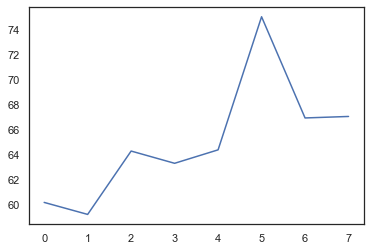

In [75]:
plt.plot(x,y)

In [78]:
data_15['wc'].describe()

count    5837.000000
mean       64.563492
std         5.790148
min        54.200001
25%        60.400002
50%        63.500000
75%        68.150002
max        81.849998
Name: wc, dtype: float64

# WC (Age: 15 years)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wc', ylabel='Density'>

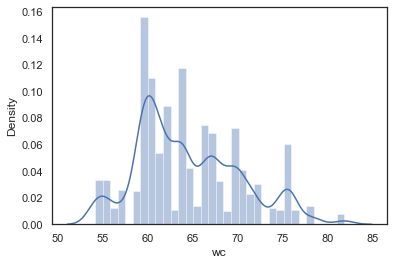

In [194]:
sns.distplot(data_15['wc'])

# Uniform Kernel

In [79]:
Min=min(data_15['wc'])
Max=max(data_15['wc'])
count=len(data_15['wc'])
print(Min,Max,count)

54.20000076293945 81.8499984741211 5837


In [80]:
#calculating standard deviation of waist circumference
import statistics as st
std_dev=st.stdev(data_15['wc'])
std_dev

5.7901484922968285

In [81]:
#optimal h
h=1.06*std_dev*((count)**(-1/5))
h

1.083322163144919

In [82]:
def kernel(xi, x, h):
    z = (xi-x)/h
    if abs(z) < 1 or abs(z)==1:
        return(0.5)
    else:
        return(0)

In [84]:
x = data_15['wc'].sort_values()

In [109]:
f = list()
for i in range(0,count):
    a = 0
    for j in range(0,count):
        a = a + kernel(x.iloc[j], x.iloc[i], h)
    f.append(a/(count*h))

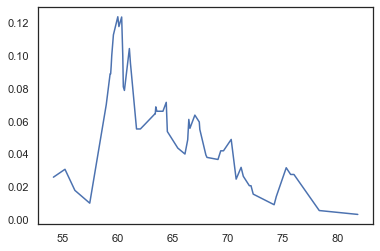

In [110]:
plt.plot(x,f)
plt.show()

# Epanechnikov Kernel

In [210]:
def Epanechnikov(xi, x, h):
    z = (xi-x)/h
    if (abs(z) < np.sqrt(5) or abs(z)==np.sqrt(5)):
        return((3/(4*np.sqrt(5)))*(1-(z**2)/5))
    else:
        return(0)

In [101]:
e = list()
for i in range(0,count):
    a = 0
    for j in range(0,count):
        a = a + kernel(x.iloc[j], x.iloc[i], h)
    e.append(a/(count*h))

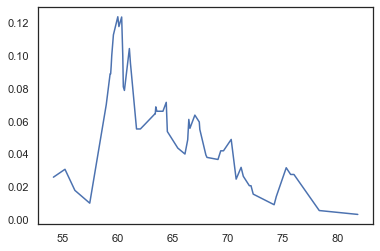

In [102]:
plt.plot(x,e)
plt.show()

In [97]:
from sklearn.neighbors import KernelDensity

In [98]:
xx=x[:,np.newaxis]

C:\Users\RIYA AGARWAL\AppData\Local\Temp\ipykernel_12184\3056196528.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xx=x[:,np.newaxis]


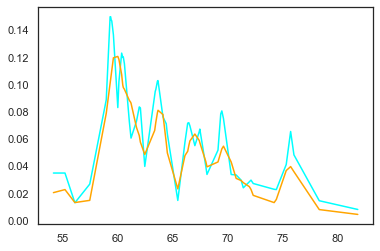

In [108]:
#Epanechnikov kernel estimation without weights
model = KernelDensity(kernel='epanechnikov',bandwidth=0.6)
model.fit(xx)
log_dens = model.score_samples(xx)
plt.plot(xx, np.exp(log_dens),c='cyan')

model_opt = KernelDensity(kernel='epanechnikov',bandwidth=h)
model_opt.fit(xx)
log_dens_opt = model_opt.score_samples(xx)
plt.plot(xx, np.exp(log_dens_opt),c='orange')

plt.show()

# Does fruit intake has impact on waist circumference ?
   (comparing linear regression and kernel fit)

In [111]:
data_15[['fruits','wc']].isna().sum()

fruits    0
wc        0
dtype: int64

In [224]:
x = data_15[['fruits']]
y = data_15[['wc']]

In [113]:
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.linear_model import LinearRegression

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Linear Regression

In [182]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [183]:
r_sq = model.score(x_train, y_train)
r_sq

0.20581722939014435

In [184]:
print(f"intercept: {model.intercept_}")

intercept: [60.38704349]


In [185]:
print(f"slope:{model.coef_}")

slope:[[1.13709174]]


In [186]:
y_pred = model.predict(x_test)

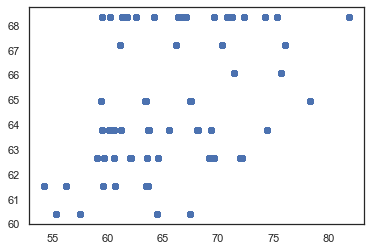

In [187]:
plt.scatter(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

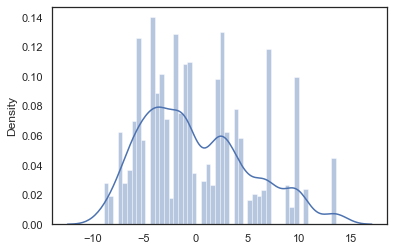

In [188]:
sns.distplot((y_test-y_pred),bins=50)

In [189]:
from sklearn import metrics

In [192]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 4.3098020068932295
MSE: 26.93374949781434
RMSE: 2.076006263693159


# Nadaraya-Watson 

In [233]:
abcd = x['fruits'].tolist()
abcd1 = y['wc'].tolist()

In [226]:
nw = list()
for i in range(0,count):
    num = 0
    denum=0
    for j in range(0, count):
        num = num + abcd1[j]*kernel(abcd[j], abcd[i], h)
        denum = denum + kernel(abcd[j], abcd[i], h)
    f = num/denum
    nw.append(f)
nw

[63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672591996,
 63.937781672

In [231]:
print('MAE:', metrics.mean_absolute_error(y,nw))
print('MSE:', metrics.mean_squared_error(y,nw))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y,nw)))

MAE: 4.222723608608412
MSE: 25.927164966382556
RMSE: 2.054926667452737


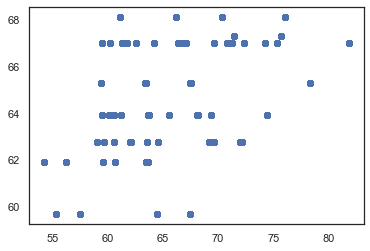

In [232]:
plt.scatter(y,nw)

In [234]:
x_list = x['fruits'].tolist()
y_list = y['wc'].tolist()

In [235]:
nw = list()
for i in range(0,count):
    num = 0
    den=0
    for j in range(0, count):
        num = num + y_list[j]*Epanechnikov(x_list[j], x_list[i], h)
        den = den + Epanechnikov(x_list[j], x_list[i], h)
    f = num/den
    nw.append(f)
nw

[63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,
 63.93104909783941,


In [236]:
print('MAE:', metrics.mean_absolute_error(y,nw))
print('MSE:', metrics.mean_squared_error(y,nw))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y,nw)))

MAE: 4.285300916241113
MSE: 26.33575344420061
RMSE: 2.0700968374066737


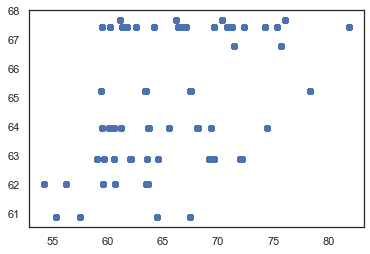

In [239]:
plt.scatter(y,nw)

In [238]:
#Conclusion: Since both the techniques applied for estimating wc using fruits fail....we can conclude that fruit intake alone is not sufficient to predict waist circumference.
#This is also supported by already existing literature whereby intake of fruits has no significant impact on wc.(https://www.semanticscholar.org/paper/Fruit-and-vegetable-intake%2C-body-mass-index-and-in-Ghalaeh-Gholi/fd91d71491c5c47fd1120e5003547549db103e41)

# Multi LR

In [248]:
age_15

,area,sex,q104,q125,q201A,q201B,q201C,q201D,q201E,q201F,...,Milk,Pulse,Green_veg,Roots_tubers,veg,fruits,eggs,fish,nonveg,nuts
16,urban,female,15.0,no,Yes,Yes,Yes,No,No,No,...,NaN,7.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN
16,urban,female,15.0,no,Yes,Yes,Yes,No,No,No,...,NaN,7.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN
16,urban,female,15.0,no,Yes,Yes,Yes,No,No,No,...,NaN,7.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN
16,urban,female,15.0,no,Yes,Yes,Yes,No,No,No,...,NaN,7.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN
16,urban,female,15.0,no,Yes,Yes,Yes,No,No,No,...,NaN,7.0,7.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,rural,female,15.0,no,No,No,No,No,Yes,No,...,NaN,2.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0
1793,rural,female,15.0,no,No,No,No,No,Yes,No,...,NaN,2.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0
1793,rural,female,15.0,no,No,No,No,No,Yes,No,...,NaN,2.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0
1793,rural,female,15.0,no,No,No,No,No,Yes,No,...,NaN,2.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0


In [245]:
age_15[age_15.columns[1:]].corr()['wc'][:].sort_values(ascending=False).to_frame()

,wc
wc,1.000000
q901r1,0.758407
muac,0.752450
@_cbmi,0.654979
ssft,0.529010
tsft,0.452139
fruits,0.442683
height,0.323578
veg,0.134064
Roots_tubers,0.111366


In [254]:
age_15 = age_15[['wc','q901r1','muac','@_cbmi','ssft','tsft','fruits','height','veg','Roots_tubers','Pulse']].dropna()

In [255]:
Y = age_15['wc']
X = age_15[['q901r1','muac','@_cbmi','ssft','tsft','fruits','height','veg','Roots_tubers','Pulse']]

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [257]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [258]:
r_sq1 = model1.score(X_train, Y_train)
r_sq1

0.7044982405869844

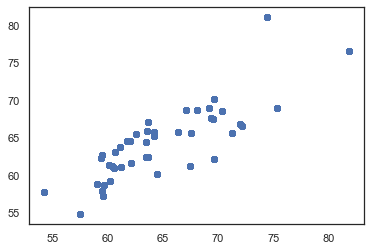

In [260]:
Y_pred = model1.predict(X_test)
plt.scatter(Y_test, Y_pred)

In [262]:
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

MAE: 2.170776403454091
MSE: 7.6887191146008105
RMSE: 1.4733554912016622


In [263]:
#Now, we are able to better predict waist circumference